# O-U process

this code simulate an example of the multivariate Ulenbeck process
The data is used to plot figure 1 OU process example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./utils')
import analysis
%config InlineBackend.figure_format='retina'
%matplotlib inline
import os

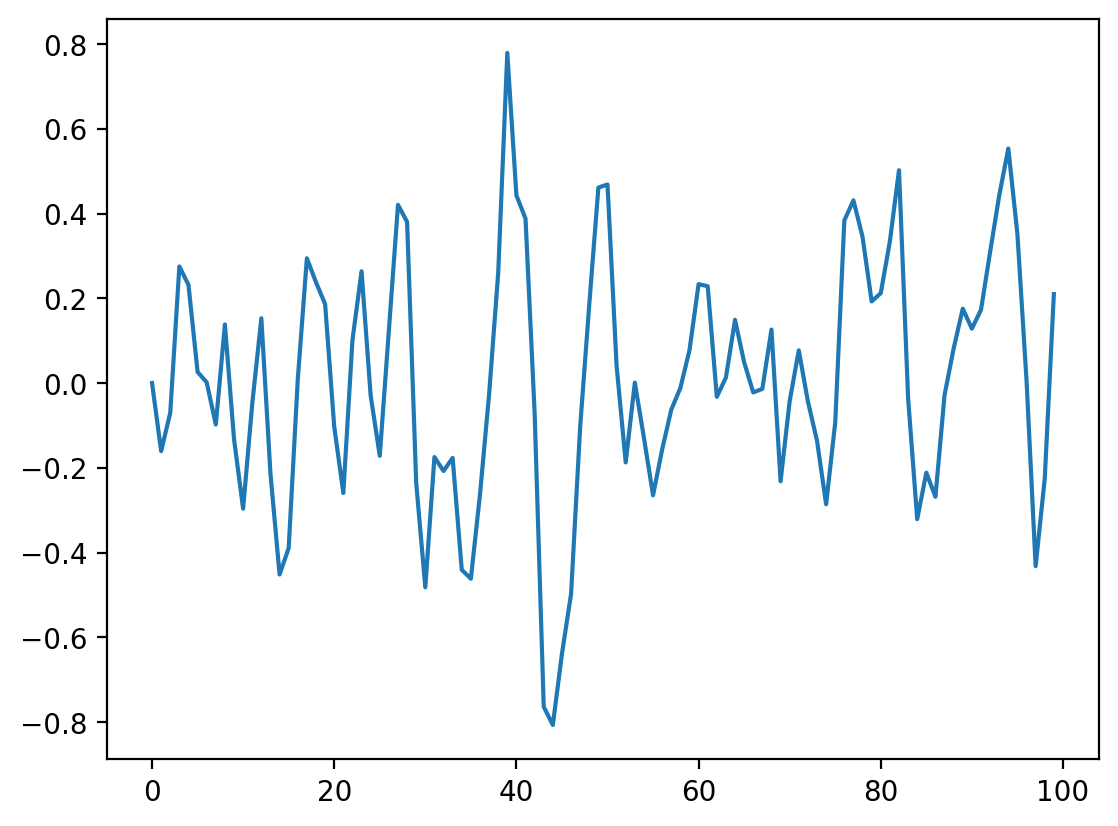

In [2]:
# define the system matrices
A = np.array([[0.6,0.6,0],[-0.6,0.6,0],[0,0,0.4]])
B = np.array([0.17,-0.15,0.28])
C = np.array([0.78,0.53,1.0])

# set  the seed of random number generator
noise_var = 0.1
# define the initial state
X0 = np.zeros(3)
# define the number of time points
T = 100000
# define the input
U = np.random.randn(3,T)
# define the noise
noise = np.random.randn(T)*np.sqrt(noise_var)
# simulate the system
X = np.zeros((3,T))
Y = np.zeros(T)
Y_offset = 0
X[:,0] = X0
for t in range(1,T):
    X[:,t] = A@X[:,t-1] + B*U[:,t-1]
    Y[t] = C@X[:,t] + noise[t] + Y_offset

# plot the output
plt.plot(X[1,:100])

In [3]:
svd_result_ou = analysis.SVD_analysis(Y, 25,25)

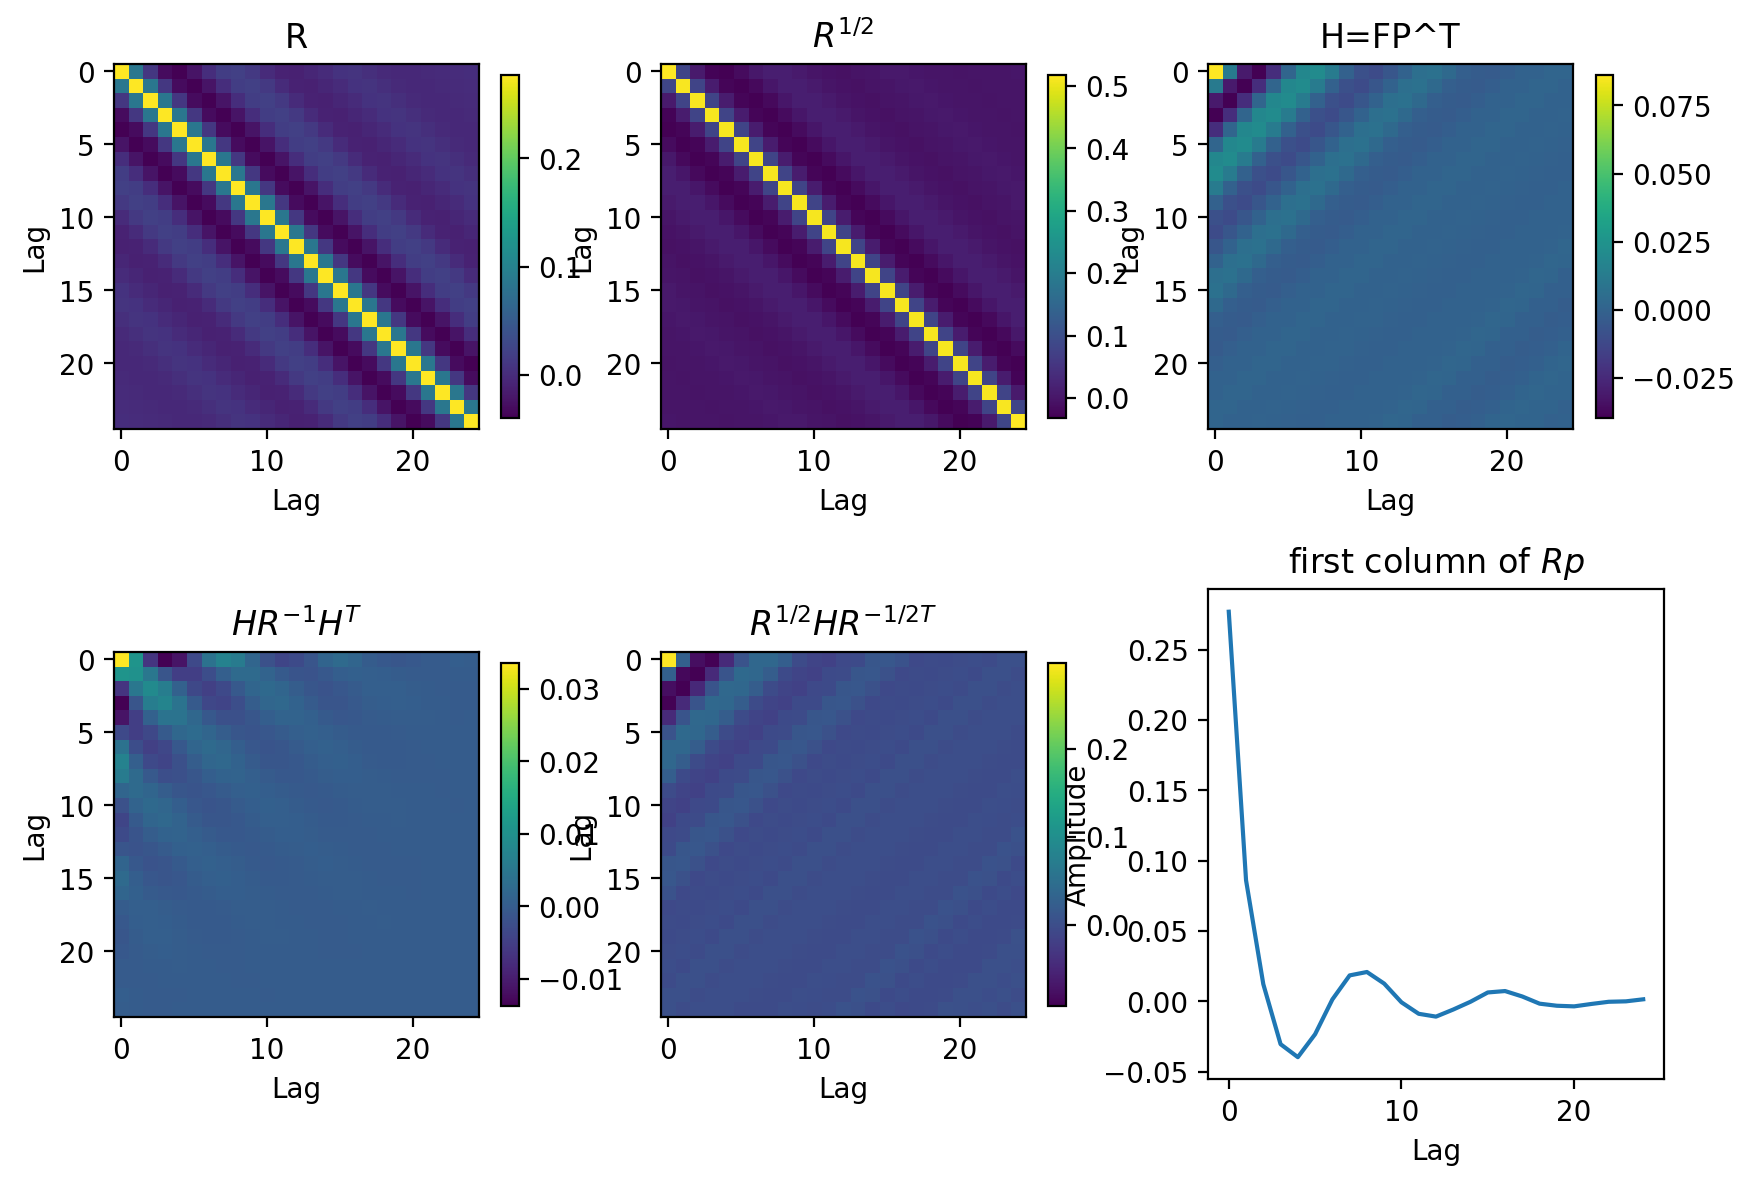

In [4]:
import plots
_,_ = plots.plot_covariance(svd_result_ou)

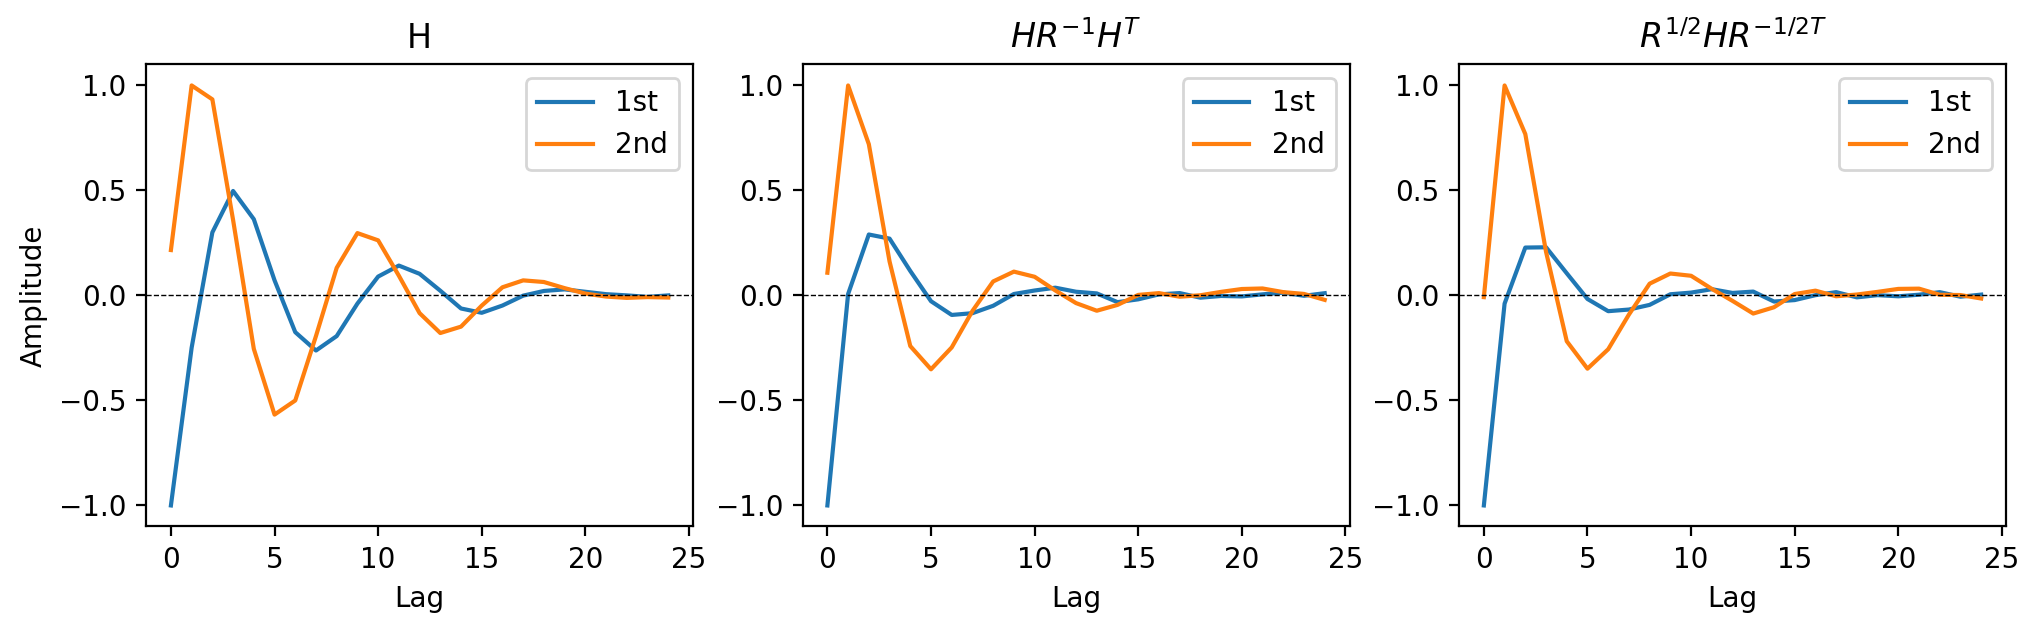

In [5]:
_,_ = plots.plot_filters(svd_result_ou)

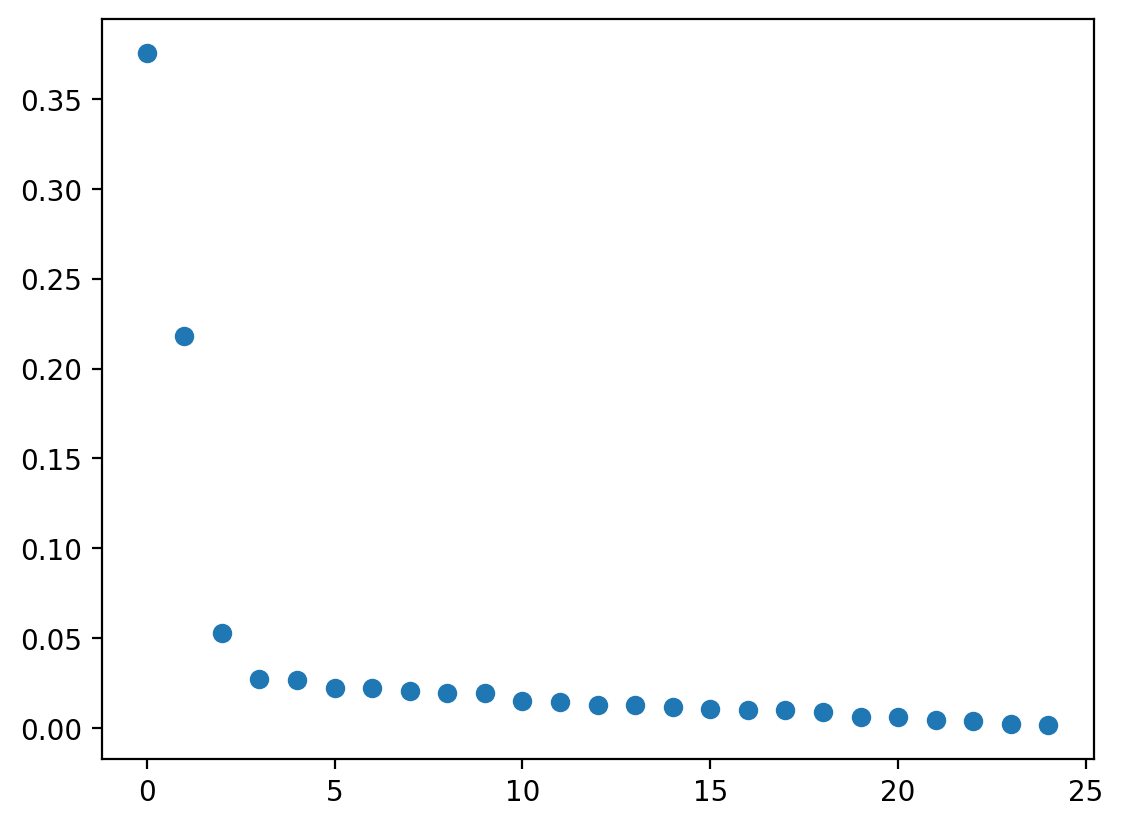

In [6]:
plt.plot(svd_result_ou['S3'],'o')

In [7]:
# save the data
import pickle

if not os.path.exists('./results'):
    os.makedirs('./results')
with open('./results/OU_process_oscillation.pkl', 'wb') as f:
    pickle.dump(svd_result_ou, f)
# how to load the data
# with open('./results/OU_process_oscillation.pkl', 'rb') as f:
#     data = pickle.load(f)